Week 2
실습 #2: Iris Flower 꽃 분류 인공지능 학습하기

In [ ]:
#Import the datasets from sklearn module
from sklearn import datasets
iris=datasets.load_iris()

#The iris data contain following information
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
#DESCR represents the description of datasets
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#The 4 features of iris data:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.data)

In [ ]:
#The names of 3 iris classes:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
#The Class is represented 0, 1, and 2
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2. Logistic Regression

In [ ]:
# Import the functions for logistic regression from sklearn module
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

### 2.1 2-class logistic regression (using 2 features)


In [ ]:
#2 class example:Iris-Virginica (Class 2) vs. else OvA (One vs. All) model
y = (iris["target"] == 2).astype(np.int)
#Use 2 features:petal width (feature 2) and Petal length (feature 3)
X = iris["data"][:,2:]

In [ ]:
#Define classifier name "log_reg"
log_reg = LogisticRegression()
#Estimate the parameter Theta
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#2-dimensional coordinate.
xx, yy = np.meshgrid(np.arange(0, 8, 0.01), np.arange(0, 3.0, 0.01))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'Petal width')

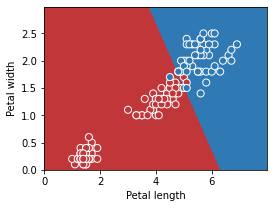

In [ ]:
Z = Z.reshape(xx.shape)
#Define size of figure
plt.figure(1, figsize = (8, 6))
#To see decision boundary, predicted value for each points are colored
plt.pcolormesh(xx, yy, Z, cmap = "RdBu"
               ,vmin = -.2, vmax = 1.2)
#Plot Datapoints with corresponding color
plt.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
#Labeling axis
plt.xlabel("Petal length")
plt.ylabel("Petal width")

In [ ]:
np.sum(log_reg.predict(X)!=y)

5

### 2.2 4-class logistic regression (using 4 features)


In [ ]:
#2 class example:Iris-Virginica (Class 2) vs. else OvA (One vs. All) model
y = (iris["target"] == 2).astype(np.int)
#Use 4 features: sepal width (feature 0), sepal length (feature 1), petal width (feature 2) and Petal length (feature 3)
X = iris["data"]

In [ ]:
#Define classifier name "log_reg"
log_reg = LogisticRegression()
#Estimate the parameter Theta
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
np.sum(log_reg.predict(X)!=y)

4

### 2.3 Softmax regression (multinomial regression)

2.3.1 Softmax regression (multinomial regression) using 2 features

In [ ]:
#Classify all 3 classes by multinomial regression
y=iris.target
#Use 2 features : petal width and petal length
X=iris["data"][:,2:]

In [ ]:
#Define classifier name "softmax_reg "
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
#Estimate the parameter Theta
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#2-dimensional coordinate.
xx, yy = np.meshgrid(np.arange(0, 8, 0.01), np.arange(0, 3.0, 0.01))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'Petal width')

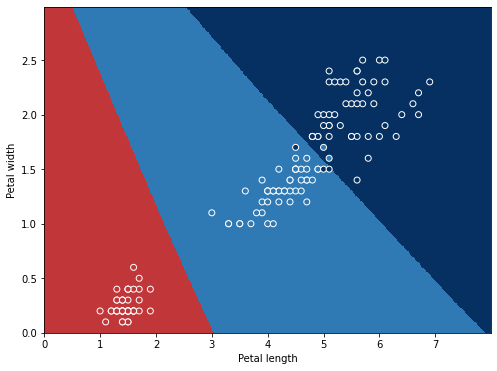

In [ ]:
Z = Z.reshape(xx.shape)
#Define size of figure
plt.figure(1, figsize=(8, 6))
#To see decision boundary, predicted value for each points are colored
plt.pcolormesh(xx, yy, Z, cmap="RdBu"
               ,vmin=-.2, vmax=1.2)
#Plot Datapoints with corresponding color
plt.scatter(X[:,0],X[:,1],c=y,cmap="RdBu"
            ,vmin=-.2, vmax=1.2
            ,edgecolor="white", linewidth=1)
#Labeling axis
plt.xlabel("Petal length")
plt.ylabel("Petal width")

In [ ]:
np.sum(softmax_reg.predict(X)!=y)

6

2.3.2 Softmax regression (multinomial regression) using 4 features

In [ ]:
#Classify all 3 classes by multinomial regression
y=iris.target
#Use 4 features: sepal width (feature 0), sepal length (feature 1), petal width (feature 2) and Petal length (feature 3)
X=iris["data"]

In [ ]:
#Define classifier name "softmax_reg "
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
#Estimate the parameter Theta
softmax_reg.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
np.sum(softmax_reg.predict(X)!=y)

3

Multinomial regression using 2 features & MLPClassifier

In [ ]:
#Classify all 3 classes by multinomial regression
y=iris.target
#Use 4 features: sepal width (feature 0), sepal length (feature 1), petal width (feature 2) and Petal length (feature 3)
X=iris["data"]

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier_MLP = MLPClassifier(activation = 'relu', hidden_layer_sizes = (16,32,16), max_iter = 20000, solver= 'lbfgs')
classifier_MLP.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 32, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
np.sum(classifier_MLP.predict(X)!=y)

1